In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('pageviews.csv', parse_dates= True, index_col= 'date')

In [6]:
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

In [48]:
fig = plt.gcf()

plt.show()

<Figure size 640x480 with 0 Axes>

In [13]:
df_clone = df.copy()

In [17]:
df_clone['month'] = df_clone.index.month_name()
df_clone['year'] = df_clone.index.year

In [18]:
df_clone['year']
df_clone['month']

date
2016-05-19    2016
2016-05-26    2016
2016-05-27    2016
2016-05-28    2016
2016-05-29    2016
              ... 
2019-11-24    2019
2019-11-29    2019
2019-11-30    2019
2019-12-01    2019
2019-12-03    2019
Name: year, Length: 1238, dtype: int32

In [54]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']

In [55]:
df_clone['month'] = pd.Categorical(df_clone['month'], categories= month_order, ordered= True)

In [57]:
df_grouped = df_clone.groupby(['year', 'month'], observed= True)['value'].mean().unstack()

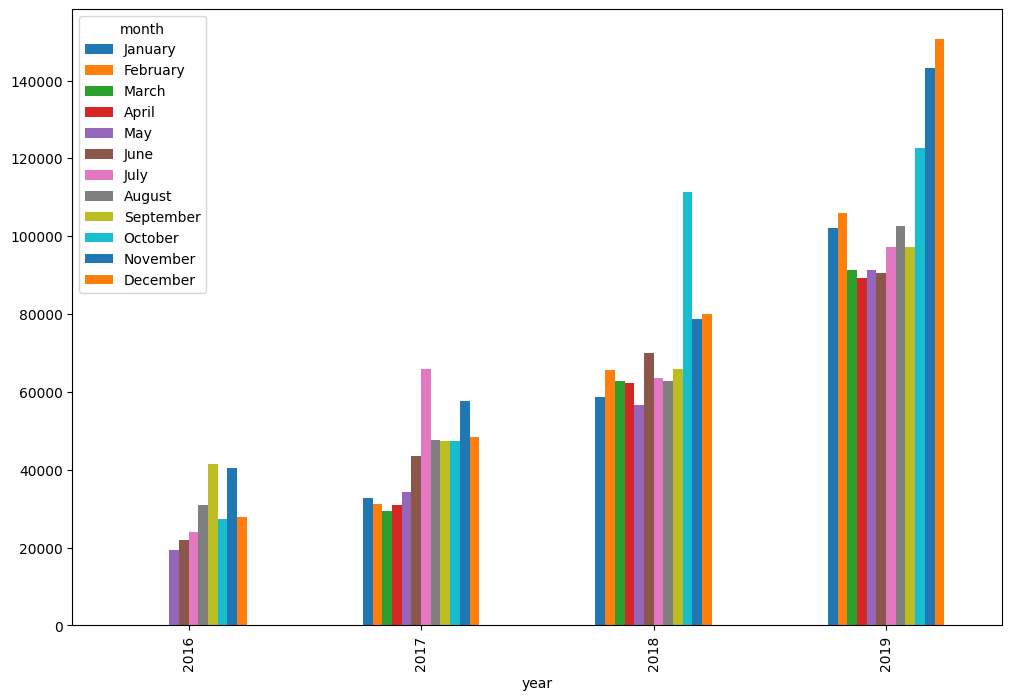

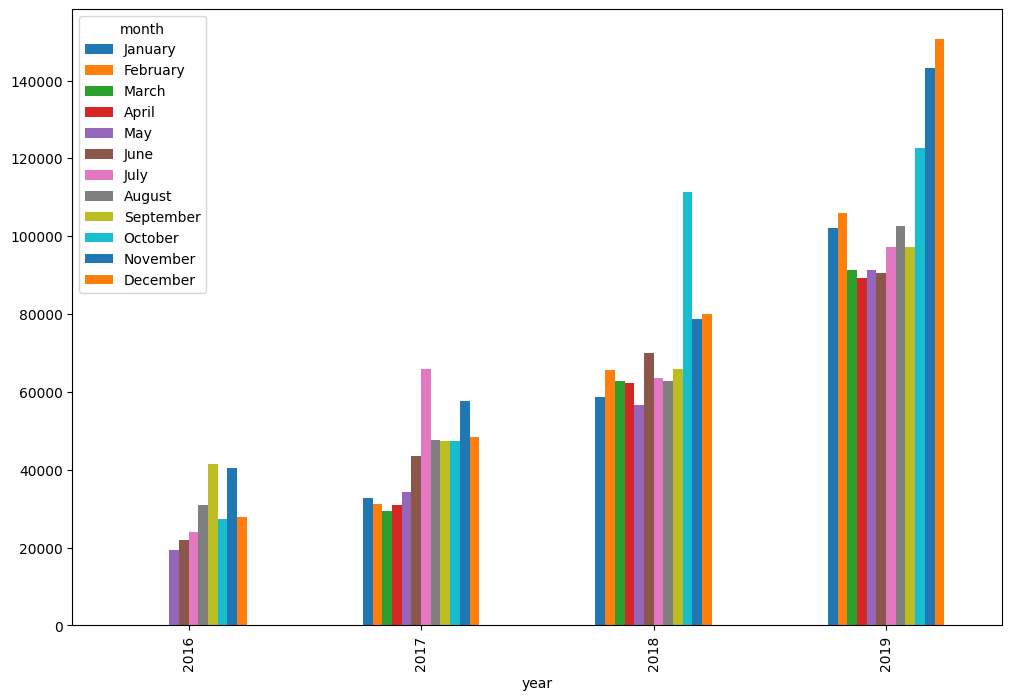

In [77]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()

    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    df_bar['month'] = pd.Categorical(df_bar['month'], categories= month_order, ordered= True)
    
    df_bar = df_bar.groupby(['year', 'month'], observed = True)['value'].mean().unstack()

    # Draw bar plot

    ax = df_bar.plot(kind = 'bar', figsize = (12, 8))

    fig = ax.get_figure()

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

draw_bar_plot()

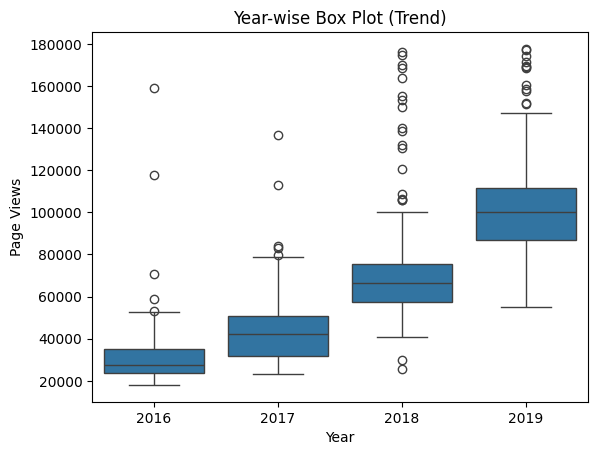

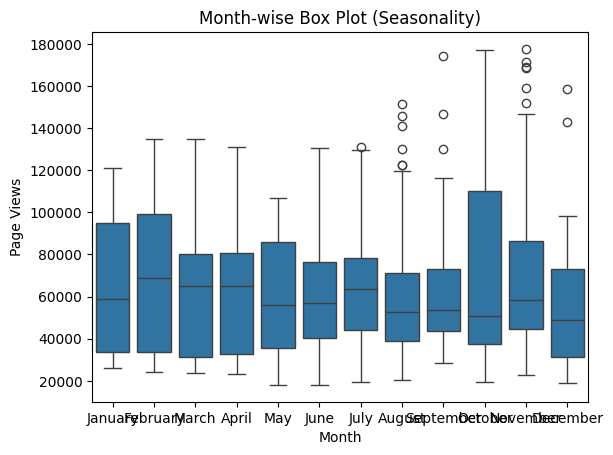

In [89]:
sns.boxplot(x = 'year', y = 'value', data = df_clone)
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.title('Year-wise Box Plot (Trend)')
plt.show()

sns.boxplot(x = 'month', y = 'value', data = df_clone)
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.title('Month-wise Box Plot (Seasonality)')
plt.show()
